In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
expedia_df = pd.read_csv(
    'C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Expedia - Hotel Recommendations\\train.csv',
    nrows=100000)
test_df = pd.read_csv(
    'C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Expedia - Hotel Recommendations\\test.csv')

In [7]:
expedia_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [10]:
# Drop Unnecessary columns, these columns wont be useful in analysis and prediction
expedia_df = expedia_df.drop(['date_time', 'site_name', 'user_location_region',
                             'user_location_city', 'orig_destination_distance', 'user_id', 'srch_co', 'srch_adults_cnt',
                             'srch_children_cnt', 'srch_rm_cnt'], axis=1)
test_df = test_df.drop(['date_time', 'site_name', 'user_location_region',
                             'user_location_city', 'orig_destination_distance', 'user_id', 'srch_co', 'srch_adults_cnt',
                             'srch_children_cnt', 'srch_rm_cnt'], axis=1)

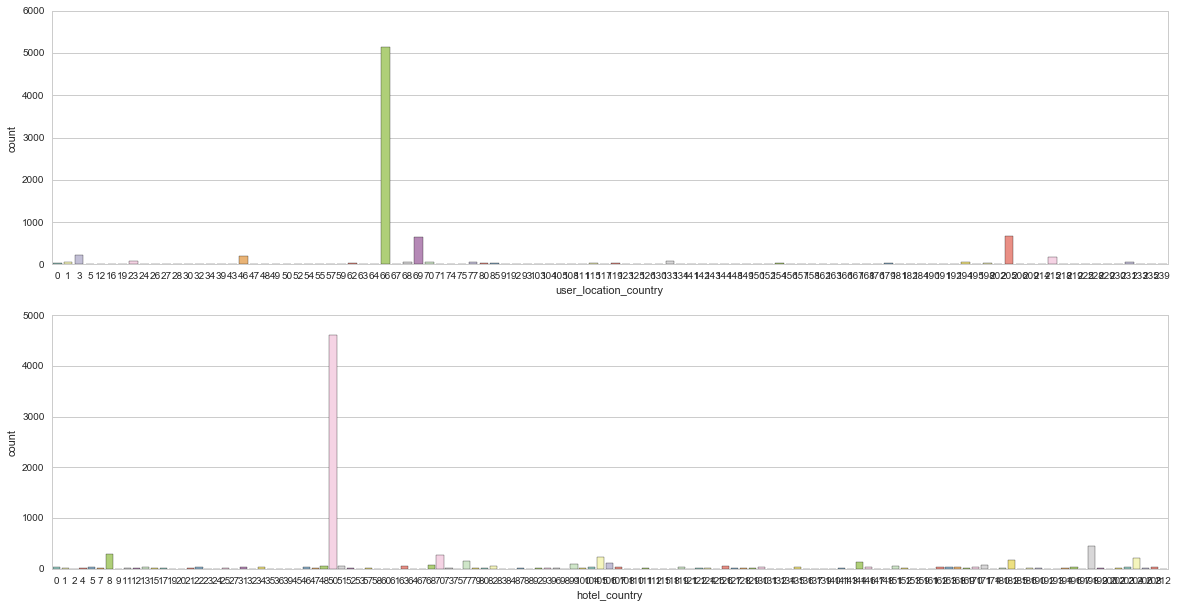

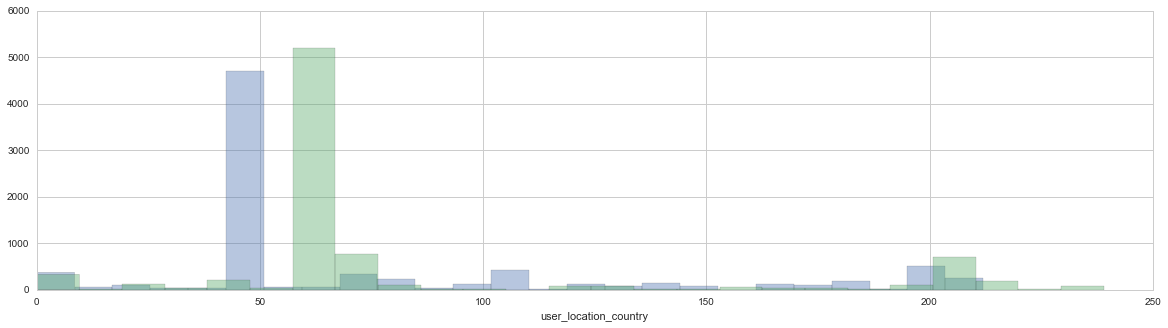

In [18]:
#plotting

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,10))

bookings_df = expedia_df[expedia_df["is_booking"] == 1]

#What are the countries customers travel the most from?
sns.countplot('user_location_country', data=bookings_df.sort_values(by=['user_location_country']), ax=axis1,palette="Set3")

#What are the countries customers travel to the most?
sns.countplot('hotel_country', data=bookings_df.sort_values(by=['hotel_country']), ax=axis2, palette="Set3")

#Combine both plots
fig, (axis1) = plt.subplots(1,1,figsize=(20,5))

sns.distplot(bookings_df['hotel_country'], kde=False, rug=False, bins=25, ax=axis1)
sns.distplot(bookings_df['user_location_country'], kde=False, rug=False, bins=25, ax=axis1)

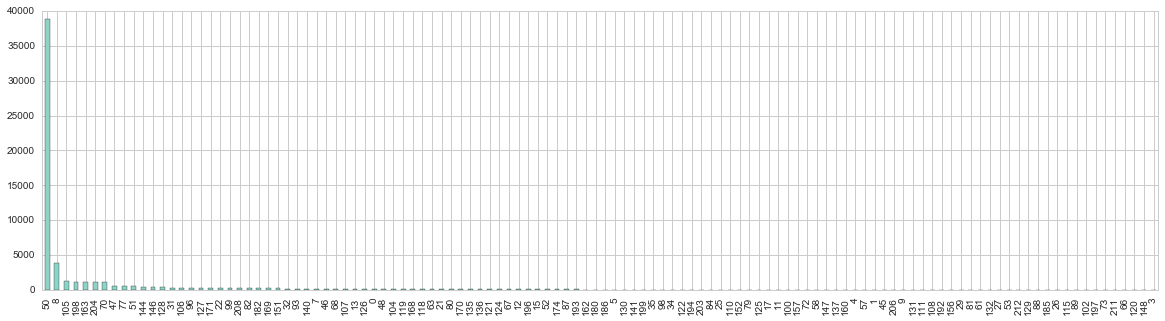

In [19]:
#Where do most customers from a country (66) travel?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = expedia_df[expedia_df['user_location_country'] == user_country_id]
country_customers['hotel_country'].value_counts().plot(kind='bar', colormap="Set3", figsize=(20,5))

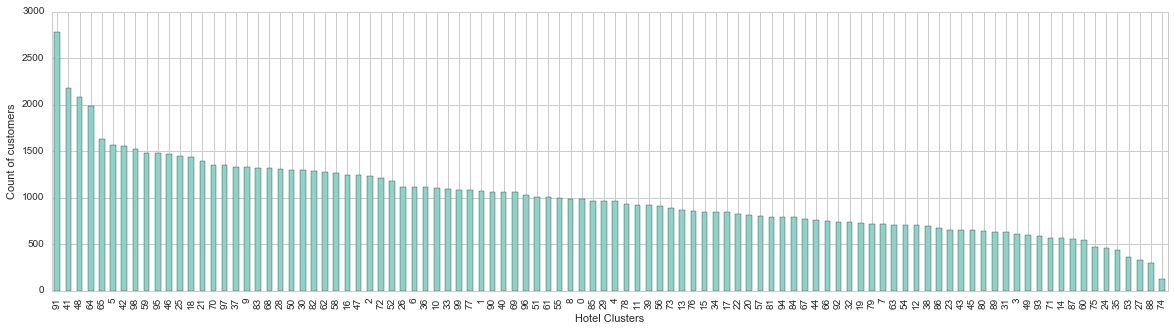

In [24]:
#Plotting frequency of each clusters
expedia_df['hotel_cluster'].value_counts().plot(kind='bar', colormap='Set3', figsize=(20,5))
plt.xlabel('Hotel Clusters')
plt.ylabel('Count of customers')

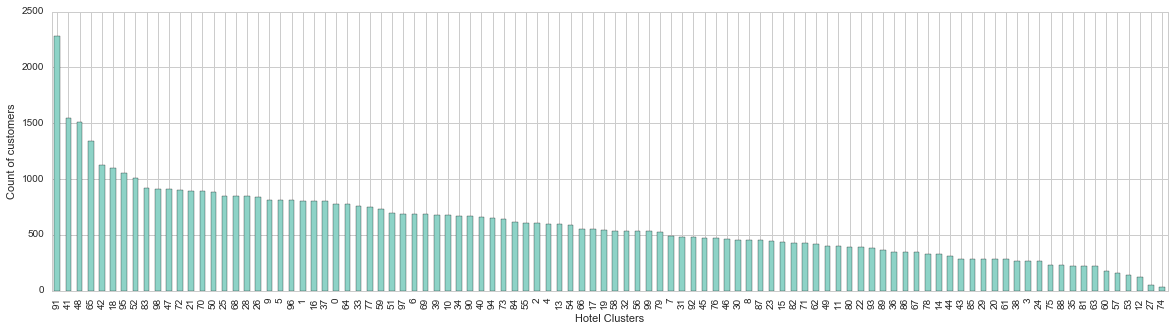

In [25]:
#What are the most frequent hotel clusters booked by customers from country 66?

user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(20,10))

customer_clusters = expedia_df[expedia_df['user_location_country'] == user_country_id]['hotel_cluster']
customer_clusters.value_counts().plot(kind='bar', colormap='Set3', figsize=(20,5))
plt.xlabel('Hotel Clusters')
plt.ylabel('Count of customers')

In [ ]:
expedia_df['hotel_cluster'].value_counts().plot(kind='bar', colormap='Set3', figsize=(15,5))